# Economic Analysis Project

Importing Necessary Library - API Setup

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

#installing Libraries some other important libraries for project
#1. pip install fredapi
#2. pip install plotly

pd.set_option("display.max_columns", 500)
plt.style.use('fivethirtyeight')

# API Key Importing
from dotenv import load_dotenv
import os

load_dotenv()
fred_api_key = os.getenv("API_KEY")


### 1. Create the 'FRED' Object.
- This object will be used to search and pull data from website.
- Fred allows us to do search the data and pull down the data.

In [73]:
fred = Fred(api_key=fred_api_key)
fred

### 2. Searching for Economic Data
- This search is similar to how we search on website searchbar but its more pythonic and in pandas.
- we will use `object.search` for economic data.
- Search Results are sorted by 'popularity'

In [74]:
s_p_search = fred.search('S&P', order_by='popularity')
s_p_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-04,2026-02-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-02-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-04 09:24:54-06:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-04,2026-02-04,S&P 500,2016-02-04,2026-02-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-03 19:01:55-06:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-04,2026-02-04,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-04,2026-02-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-02-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-04 09:24:48-06:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2026-02-04,2026-02-04,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-02-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-04 09:25:49-06:00,85,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1501ACSTOTAL011001,S1501ACSTOTAL011001,2026-02-04,2026-02-04,People 25 Years and Over Who Have Completed an...,2009-01-01,2024-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2026-01-29 09:29:37-06:00,3,Estimate of educational attainment for populat...
PLXCPPINA670NRUG,PLXCPPINA670NRUG,2026-02-04,2026-02-04,Price Level of Exports for India,1950-01-01,2023-01-01,Annual,A,Price Level of USA Output-side GDP in 2021=1,Price Level of USA Output-side GDP in 2021=1,Not Seasonally Adjusted,NSA,2026-02-04 11:46:05-06:00,3,Source ID: pl_x When using these data in your...
GCT1502ME,GCT1502ME,2026-02-04,2026-02-04,Bachelor's Degree or Higher for Maine,2006-01-01,2024-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2025-09-11 09:12:15-05:00,3,Estimate of educational attainment for populat...


In [75]:
s_p_search.shape

(1000, 15)

In [76]:
s_p_search.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-04,2026-02-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-02-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-04 09:24:54-06:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-04,2026-02-04,S&P 500,2016-02-04,2026-02-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-03 19:01:55-06:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-04,2026-02-04,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-04,2026-02-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-02-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-04 09:24:48-06:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2026-02-04,2026-02-04,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-02-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-04 09:25:49-06:00,85,The ICE BofA Option-Adjusted Spreads (OASs) ar...
DJIA,DJIA,2026-02-04,2026-02-04,Dow Jones Industrial Average,2016-02-04,2026-02-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-03 19:05:12-06:00,77,The observations for the Dow Jones Industrial ...
BAMLHE00EHYIOAS,BAMLHE00EHYIOAS,2026-02-04,2026-02-04,ICE BofA Euro High Yield Index Option-Adjusted...,1997-12-31,2026-02-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-04 09:24:36-06:00,74,This data represents the Option-Adjusted Sprea...
MEHOINUSA646N,MEHOINUSA646N,2026-02-04,2026-02-04,Median Household Income in the United States,1984-01-01,2024-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2025-09-09 13:19:03-05:00,74,Household data are collected as of March. As ...
STLENI,STLENI,2026-02-04,2026-02-04,St. Louis Fed Economic News Index: Real GDP No...,2013-04-01,2025-10-01,Quarterly,Q,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2026-01-30 09:50:27-06:00,74,St. Louis Fed’s Economic News Index (ENI) uses...


### 3. Pulling Raw Data And Plotting

<Axes: title={'center': 'S&P 500'}>

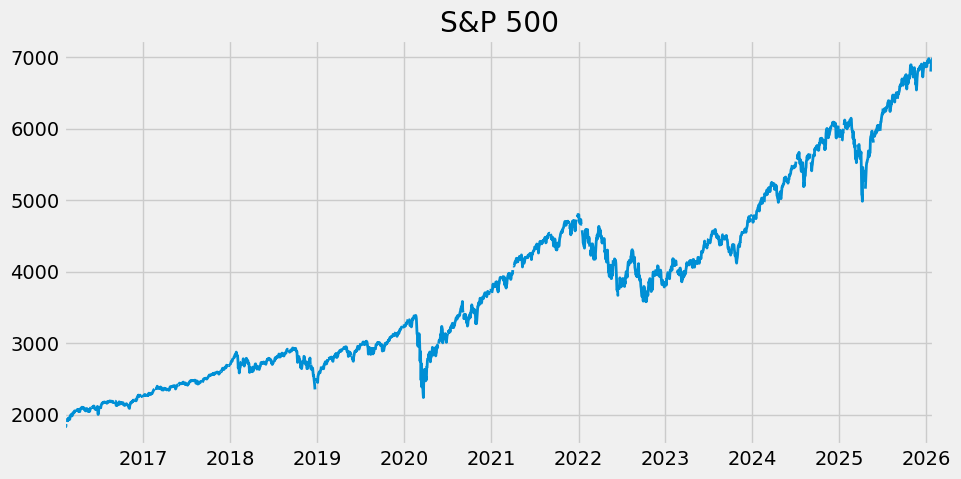

In [77]:
# Pulling using object.get_series and providing id of series
sp500_data = fred.get_series(series_id='SP500')

# Plotting 
sp500_data.plot(figsize=(10,5), title='S&P 500', linewidth=2)

### 4. Pull and Join Multiple Data Series
- Pulling Unemployment Rate Datasets.


In [78]:
uemp_data = fred.search('unemployement', order_by='popularity')
uemp_data

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2026-02-04,2026-02-04,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2025-12-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2026-01-13 08:08:07-06:00,98,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2026-02-04,2026-02-04,Unemployment Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:10:37-06:00,98,The unemployment rate represents the number of...
SAHMREALTIME,SAHMREALTIME,2026-02-04,2026-02-04,Real-time Sahm Rule Recession Indicator,1959-12-01,2025-12-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2026-01-09 08:23:02-06:00,87,Sahm Recession Indicator signals the start of ...
PAYEMS,PAYEMS,2026-02-04,2026-02-04,"All Employees, Total Nonfarm",1939-01-01,2025-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2026-01-09 08:11:04-06:00,85,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2026-02-04,2026-02-04,Initial Claims,1967-01-07,2026-01-24,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2026-01-29 07:33:44-06:00,82,An initial claim is a claim filed by an unempl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBSSA08,LBSSA08,2026-02-04,2026-02-04,Labor Force Participation Rate for Colorado,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-29 11:40:43-06:00,6,A state's labor-force participation rate is th...
IAPLYM9URN,IAPLYM9URN,2026-02-04,2026-02-04,"Unemployment Rate in Plymouth County, IA",1990-01-01,2025-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2026-01-16 13:17:09-06:00,6,These data come from the Current Population Su...
LRUN64TTCAQ156S,LRUN64TTCAQ156S,2026-02-04,2026-02-04,Infra-Annual Labor Statistics: Unemployment Ra...,1976-01-01,2025-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2026-01-15 15:13:43-06:00,6,OECD Data Filters: REF_AREA: CAN MEASURE: UNE...


**Pulling Unrate Dataset**

In [79]:
unrate_dataset = fred.get_series('UNRATE')

unrate_dataset

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2025-08-01    4.3
2025-09-01    4.4
2025-10-01    NaN
2025-11-01    4.5
2025-12-01    4.4
Length: 936, dtype: float64

**Plotting Unrate**

<Axes: >

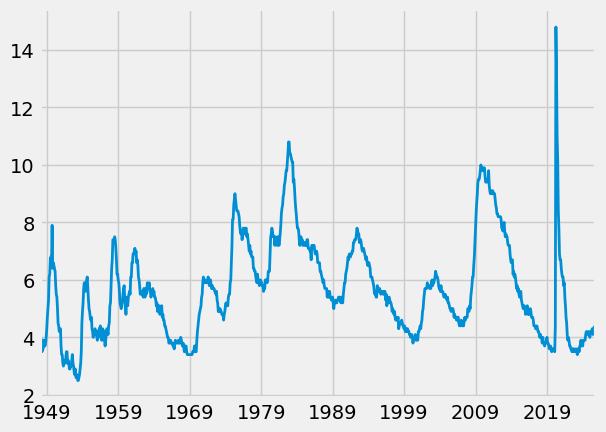

In [80]:
unrate_dataset.plot(lw=2)

- filtering down more precisely dataset that has unemployement rate and not monthly adjusted.
- locating unemployement rate where title is `Unemployement Rate`.

In [81]:
unemp_df = fred.search('unemployement rate state', filter=('frequency','Monthly'))
unemp_df= unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2026-02-04,2026-02-04,Unemployment Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:10:37-06:00,98,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2026-02-04,2026-02-04,Unemployment Rate - Black or African American,1972-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:03-06:00,67,The series comes from the 'Current Population ...
LNS14024887,LNS14024887,2026-02-04,2026-02-04,Unemployment Rate - 16-24 Yrs.,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:12:38-06:00,65,The series comes from the 'Current Population ...
CAUR,CAUR,2026-02-04,2026-02-04,Unemployment Rate in California,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:30-06:00,64,None
LNS14000024,LNS14000024,2026-02-04,2026-02-04,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:14-06:00,57,The series comes from the 'Current Population ...
TXUR,TXUR,2026-02-04,2026-02-04,Unemployment Rate in Texas,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:47:48-06:00,54,None
NYUR,NYUR,2026-02-04,2026-02-04,Unemployment Rate in New York,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:47:51-06:00,53,None
FLUR,FLUR,2026-02-04,2026-02-04,Unemployment Rate in Florida,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:47:58-06:00,51,None
ALUR,ALUR,2026-02-04,2026-02-04,Unemployment Rate in Alabama,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:40-06:00,47,None


In [82]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

all_results

[            UNRATE
 1948-01-01     3.4
 1948-02-01     3.8
 1948-03-01     4.0
 1948-04-01     3.9
 1948-05-01     3.5
 ...            ...
 2025-08-01     4.3
 2025-09-01     4.4
 2025-10-01     NaN
 2025-11-01     4.5
 2025-12-01     4.4
 
 [936 rows x 1 columns],
             U6RATE
 1994-01-01    11.7
 1994-02-01    11.4
 1994-03-01    11.5
 1994-04-01    11.3
 1994-05-01    10.9
 ...            ...
 2025-08-01     8.1
 2025-09-01     8.1
 2025-10-01     NaN
 2025-11-01     8.7
 2025-12-01     8.4
 
 [384 rows x 1 columns],
             LNS14000006
 1972-01-01         11.2
 1972-02-01         11.2
 1972-03-01         10.7
 1972-04-01          9.8
 1972-05-01         10.2
 ...                 ...
 2025-08-01          7.6
 2025-09-01          7.6
 2025-10-01          NaN
 2025-11-01          8.2
 2025-12-01          7.5
 
 [648 rows x 1 columns],
             LNS14024887
 1948-01-01          6.8
 1948-02-01          7.7
 1948-03-01          8.7
 1948-04-01          7.8
 1948-05-01   

In [83]:
#Dropped unnecessary columns and Null Values
unemp_states = pd.concat(all_results, axis=1).drop(['UNRATE','LNS14000006', 'LNS14024887', 'LNS14000024', 'LNS14000002', 
                                     'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14027662', 'LNS14000036',
                                     'LNS14000003', 'LNS14000009', 'LNS14000001', 'LNS14000031', 'LNS14000012', 'LNS14027660',
                                     'LNS13025703', 'LNS14027659', 'LNS14000032', 'LNS14000060', 'LASMT261982000000003',
                                     'LASMT534266000000003', 'LBSSA13', 'LBSSA01', 'LBSSA22', 'LBSSA28', 'LBSSA06',
                                     'LRUN64TTUSM156S', 'LNS14032183','U6RATE', 'U2RATE', 'U4RATE', 'U5RATE', 'U1RATE'], axis=1)
unemp_states = unemp_states.dropna()

#Here we are mapping id to State Names: 

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

**Plotting Unemployement State dataframe**
- Plotly will filter out states.

In [84]:
px.line(unemp_states)

#### Pull Jan 1983 Unemployement Rate Per State

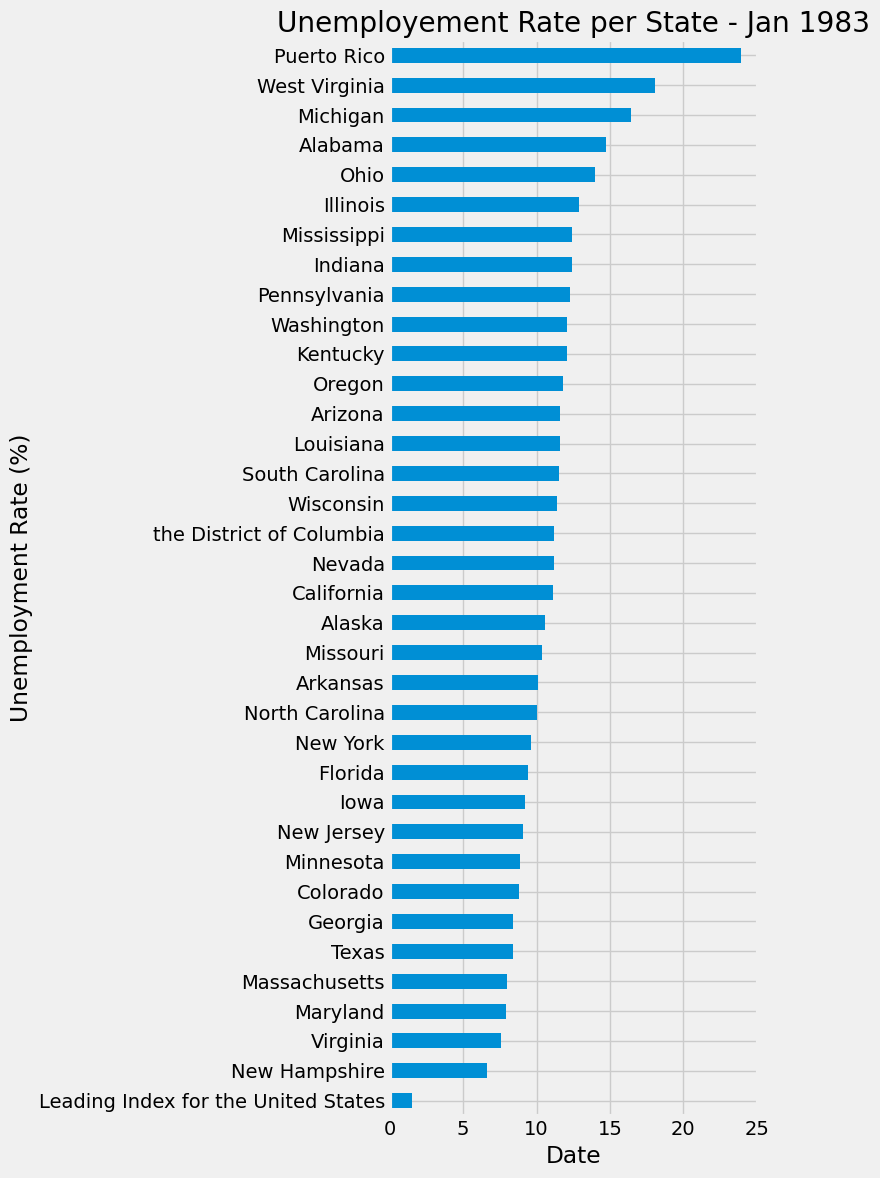

In [90]:
ax = unemp_states.loc[unemp_states.index == '1983-01-01'].T.sort_values('1983-01-01').plot(kind='barh', figsize=(8,12))
ax.set_title("Unemployement Rate per State - Jan 1983")
ax.set_xlabel("Date")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend().remove()
plt.tight_layout()
plt.show()